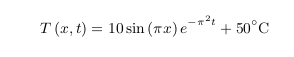



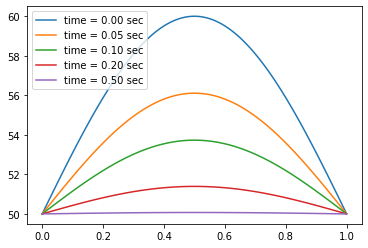

In [9]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 1.
Lx = 1. # meters



Nx = 100
h_x = Lx / Nx
x_arr = h_x * (np.arange(Nx+1))
#print(h_x)

#print (x_arr)


#t = 0.
#t = 10. #seconds

t_arr = np.array([0,0.05,0.1,0.2,0.5]) # seconds 


PI = 3.14 #np.pi



for t in t_arr:
    
    T_analytic = 10.* np.sin(PI * x_arr )* np.exp(-PI**2 * t) + 50.
    plt.plot(x_arr, T_analytic,label = 'time = %.2f sec'%(t))
    
plt.legend(loc="upper left")


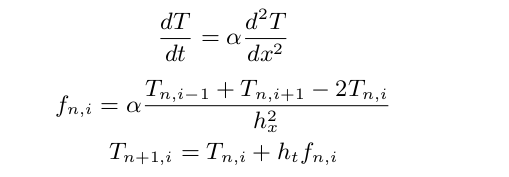



In [11]:


import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
alpha = 1.
#===== X Array =====
Lx = 1. # meters
Nx = 100
h_x = Lx / Nx
x_arr = h_x * (np.arange(Nx+1))
#===== Time Array =====
h_t = 0.001 # seconds
Nt = 1000 # number of time steps
total_time = Nt * h_t # seconds
t_arr = h_t * (np.arange(Nt+1))
print (t_arr)


#===








[0.    0.001 0.002 ... 0.998 0.999 1.   ]
